In [1]:
# Imports:
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Data

In [2]:
# a.  Load Concrete_Data_Yeh.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. 

data = pd.read_csv("C:/Users/miche/Downloads/Concrete_Data_Yeh.csv")

display(data.head())
display(data.describe())
display(data.shape)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


(1030, 9)

In [3]:
# Using markdown, explain the meaning of each column and make observations about the dataset.

**Explanation:**
<pre>
cement: amount of cement in the concrete mix
slag: amount of blast furnace slag
flyash: amount of fly ash
water: amount of water used in the mix
superplasticizer: chemical admixture
coarseaggregate: amount of coarse aggregates like gravel
fineaggregate: amount of fine aggregates like sand
age: age of the concrete in days
csMPa: compressive strength of the concrete
</pre>
**Observations:**
1. The size of the dataset is 1030 rows by 9 rows
2. There are multiple columns with a minimum value of zero
3. The column with the highest minimum value is coarseaggregate, this column also has the highest maximum value
4. The label of this dataset is csMPa

In [4]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. 
#     Use pandas.DataFrame.duplicates to check for duplicate entries. 
#     Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. 

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

# Fix duplicate values
new_data = data.drop_duplicates()
print("New Data: \n", new_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

Duplicates: 
 25
Nulls or Missing: 
 cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64
New Data: 
 0


In [5]:
# Use markdown to make observations and explain what you have done.

**Explanation:**
<pre>
From the EDA performed in the previous cell:
- no null/missing values.
- All data types were correctly assigned: all columns except for age are floats and age is an integer.
- We identified 25 duplicate rows and removed them using 'drop_duplicates()'
- We verified that the duplicates were successfully removed from the new dataset
</pre>

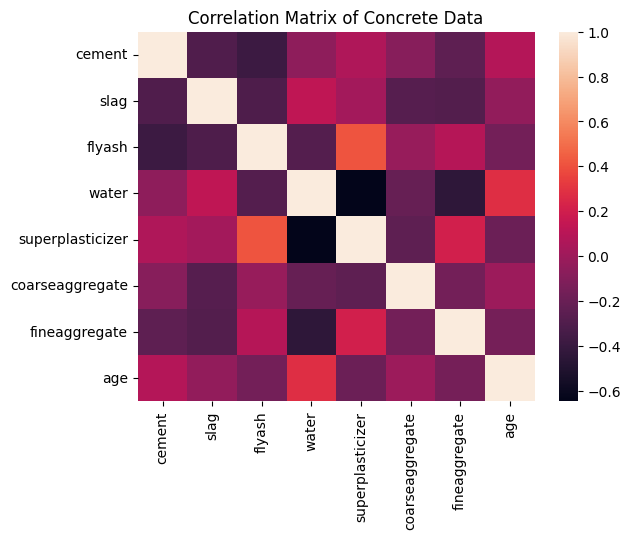

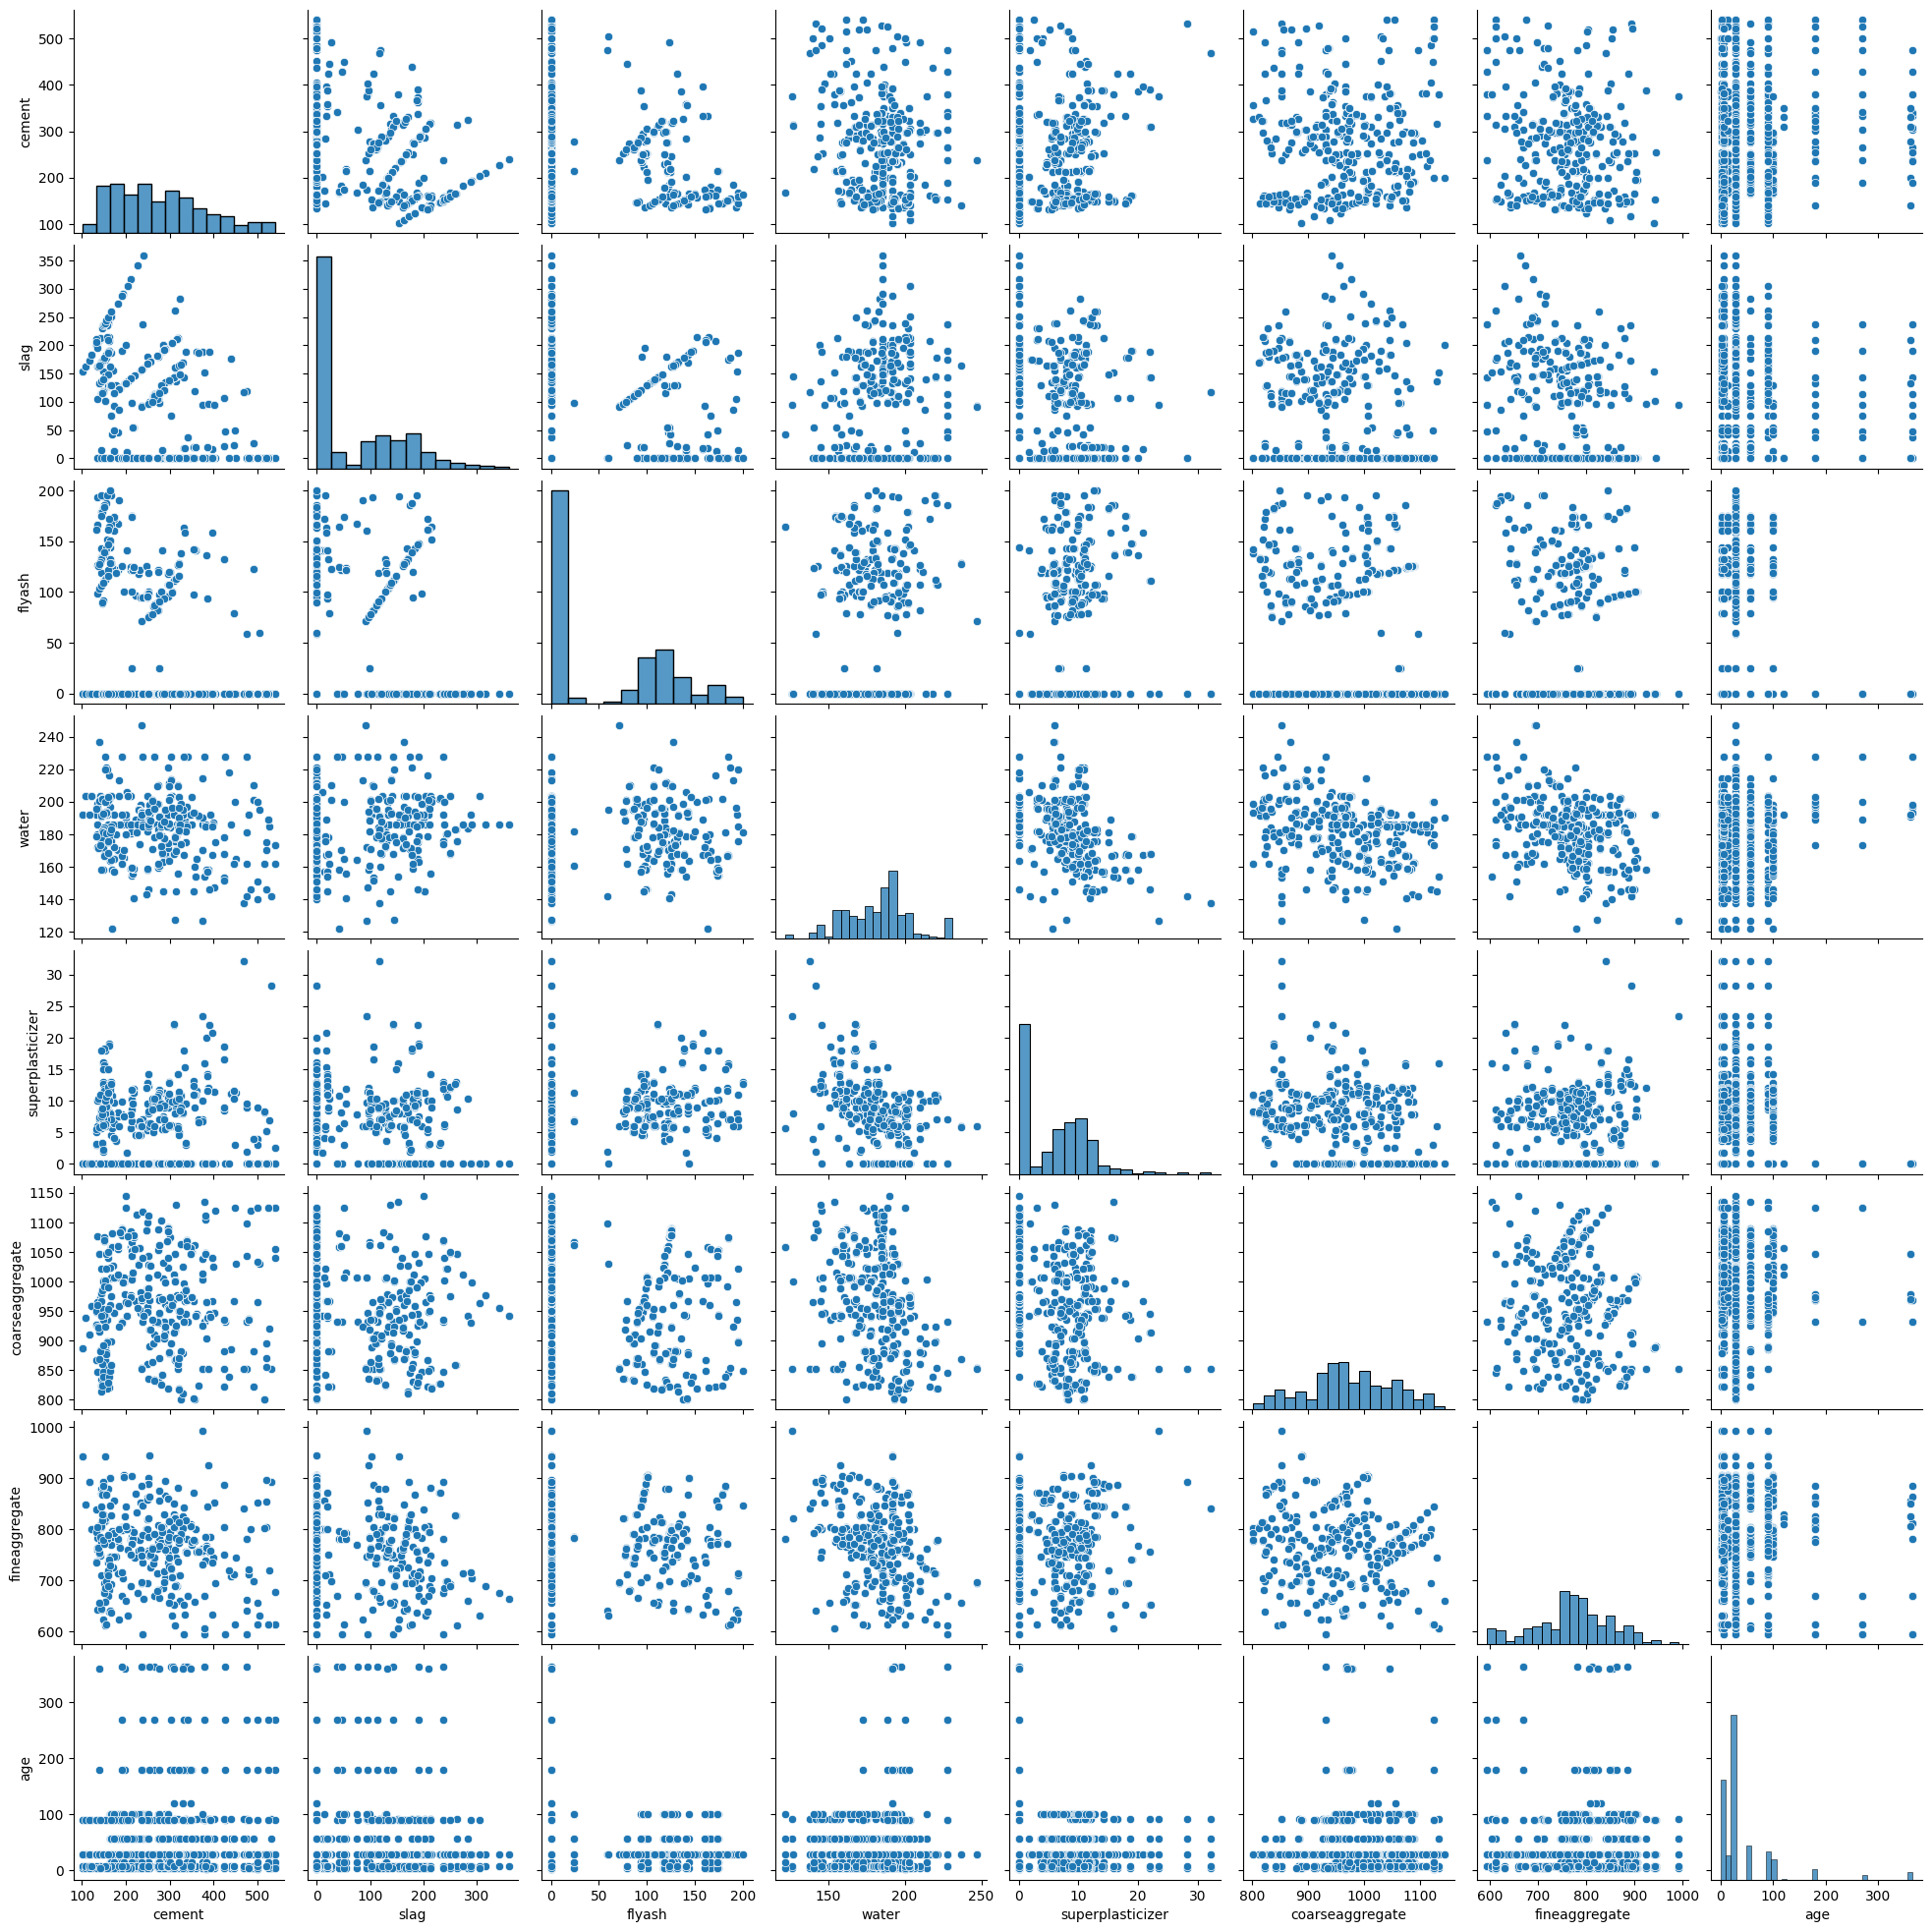

In [6]:
# c.  Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. 

# Obtain only the features
features = new_data.drop(columns=["csMPa"])

sns.heatmap(features.corr())
plt.title("Correlation Matrix of Concrete Data")
plt.show()

sns.pairplot(data=features)

In [7]:
# Use markdown to make observations and comment on which features are most correlated with compressive strength.

**Explanation:**

- The heatmap revealed that no features are strongly positively correlated
- However, water and superplasticizer show a strong negative correlation
- Othe notable correlations include:
  - flyash and superplasticizer
  - water and age
  - superplasticizer and fineaggregate

The pariplot visually confirms these relationships and helps identify feature interactions.

In [8]:
# d.  Move the labels to a separate dataframe. Use sklearn.preprocessing.MinMaxScaler to scale the features (but not the labels). 
#     Split the data so that 10% is used for testing and 90% for training.

label = pd.DataFrame(new_data["csMPa"])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_features = pd.DataFrame(data=scaled_data)

x_train, x_test, y_train, y_test = train_test_split(scaled_features, label, train_size=0.9, random_state=42)

# Print length to ensure that the splitting worked, and test the scaled dataset to ensure the scaling of the features worked
print(f'x_train length: {len(x_train)} \nx_test length: {len(x_test)}')
scaled_features.head()

x_train length: 904 
x_test length: 101


,0,1,2,3,4,5,6,7
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


# 2. Modeling

In [9]:
# a.  For both the train and test datasets, save the csMPA column (the label y) as a 2d tensorflow variable and the other columns (the features x) 
# as a separate 2d tensorflow variable. 

# Change data types to floats to avoid errors
x_raw = tf.cast(x_train.values, dtype=tf.float32)
y_raw = tf.cast(y_train.values, dtype=tf.float32)

x = tf.reshape(x_raw, shape=(-1, x_train.shape[1]))
y = tf.reshape(y_raw, shape=(-1, 1))

print(x.shape)
print(y.shape)

(904, 8)
(904, 1)


In [10]:
# b.  Use tf.zeros to create tensorflow variables of the appropriate shape for the weights (w) and bias (b).

num_features = x.shape[1]
output_size = 1

w = tf.Variable(tf.zeros([num_features, output_size]), dtype=tf.float32)
print(w)
b = tf.Variable(tf.zeros([output_size, 1]), dtype=tf.float32)
print(b)

<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>


In [11]:
# c. Write a regression function to implement the equation z = xw + b
#    and return the value z. (This is similar to the perceptron function in Exercise 2.02, but without the extra step of using tf.sigmoid. 
#    Note that multilinear regression is similar to a perceptron but does not use an activation function.)

def regression(x):
    z = tf.add(tf.matmul(x,w), b)
    return z

In [12]:
# d.  Write a loss function as a lambda function that calculates |y - ŷ| where y is the label and ŷ is the prediction.

loss = lambda: tf.abs(y - regression(x))

In [13]:
# e.  Write a train function that uses tf.optimizer.SGD to minimize the loss with respect to w and b. 
#     Choose an appropriate learning rate. Train a model for at least 1000 epochs on training data.

learning_rate=0.01
optimizer = tf.optimizers.SGD(learning_rate)
def train(epochs):
    for n in range(epochs):
        optimizer.minimize(loss, var_list=[w, b])

train(1000)

In [14]:
# f.  Print out the trained weights and bias. Use the regression function you wrote to predict the strength for each row of training data. 
#     Write a function to find the root-mean-squared-error of the predictions and use it to print out the RMSE of the model.

print(f"Weight: {w.numpy()}")
print(f"Bias: {b.numpy()}")

y_pred = regression(x)

def RMSE(y, y_pred):
    rmse = mean_squared_error(y_true=y, y_pred=y_pred, squared=False)
    return rmse

print(f"RMSE: {RMSE(y, y_pred)}")

Weight: [[ 51.076874 ]
 [ 34.072536 ]
 [ 16.40348  ]
 [-22.93174  ]
 [  7.212176 ]
 [  2.0897734]
 [  5.880561 ]
 [ 60.732723 ]]
Bias: [[2.8499494]]
RMSE: 10.800477027893066


# 3. Conclusion

In [15]:
# a.  Use your model to make predictions on the test data.

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(predictions)

[[23.50193227]
 [16.38347677]
 [21.83953878]
 [37.22041157]
 [43.12819535]
 [21.96115199]
 [13.883162  ]
 [45.0224882 ]
 [33.38069026]
 [50.40459653]
 [33.45959109]
 [29.58874796]
 [44.98615043]
 [51.01186057]
 [28.75766058]
 [21.09369691]
 [32.57977411]
 [43.26444636]
 [37.24785668]
 [52.86485771]
 [32.66711253]
 [14.066132  ]
 [30.66930761]
 [29.45779395]
 [12.66515035]
 [34.46436016]
 [47.54422437]
 [33.31016737]
 [30.54181089]
 [49.69239952]
 [39.74954975]
 [46.62845902]
 [61.88226747]
 [38.29186841]
 [24.89874854]
 [66.82535221]
 [37.96769194]
 [35.71424154]
 [35.89917346]
 [70.10923326]
 [33.71105543]
 [28.41638168]
 [37.7454292 ]
 [39.92430977]
 [45.10688695]
 [44.75039312]
 [51.60457987]
 [23.36834129]
 [53.72315716]
 [32.6788824 ]
 [32.62194181]
 [46.78581482]
 [29.18296887]
 [23.70453807]
 [21.55302329]
 [31.46835208]
 [50.61899222]
 [21.7325105 ]
 [41.3659598 ]
 [58.82197095]
 [30.65998529]
 [30.29080719]
 [29.60935234]
 [30.56429369]
 [52.76333601]
 [54.73601693]
 [32.85400

In [16]:
# b.  Write code to calculate the percentage of deviations |y - ŷ| that are bigger than the RMSE.

dev = loss()
RMSE_value = RMSE(y, y_pred)

larger_dev = dev > RMSE_value
int_tensor = tf.cast(larger_dev, dtype=tf.int32)
true_count = tf.reduce_sum(int_tensor)
precent = (true_count/len(dev)) * 100
precent.numpy()

24.668141592920353

In [17]:
# c.  Use markdown to comment on how well the model works to make predictions. 
#     What uncertainty would you provide to the structural engineers to go along with the strength predictions of the model? 

**Explanation:**
<pre>
The model achieved an RMSE of approximately 10.66, indicating the average prediction error. 
This level of error suggests the model is not overfitting or underfitting.

Approximately 24.67% of predictions deviate from the actual values by more than the RMSE.
This means that about 75% of the predictions fall within the expected error range, which supports the model's reliability.

To communicate uncertainty to structural engineers, we can report that the model has a 25% uncertainty margin.
</pre>